In [1]:
import numpy as np
from pathlib import Path
import jax
import jax.numpy as jnp
import matplotlib.pyplot as plt

from twoStwoR import ppo, eval_utils
from twoStwoR import TwoSTwoR

In [2]:
RUN_NAME = "ppo_twoStwoR_run1_reward_seeds_only"
opath = Path(f"../figures/{RUN_NAME}")
opath.mkdir(parents=True, exist_ok=True)

In [3]:
config = {
    "NUM_STEPS": 128,
    "NUM_ENVS": 16,
    "NUM_ACTORS": 2,
    "TOTAL_TIMESTEPS": 5e6,
    "UPDATE_EPOCHS": 4,
    "NUM_MINIBATCHES": 4,
    "GAMMA": 0.99,
    "GAE_LAMBDA": 0.95,
    "VF_COEF": 0.5,
    "ENT_COEF": 0.01,
    "CLIP_EPS": 0.2,
    "SEED": 42,
    "ACTIVATION": "tanh",
    "LR": 2.5e-4,
    "GRID_SIZE": 10,
}

In [4]:
train_fn = ppo.make_train(config)
rng = jax.random.PRNGKey(config["SEED"])
out = train_fn(rng)
train_state, env_state, obs, rng = out['runner_state']
tree_traj, fungus_traj, metric = out['info']

In [5]:
tree_state, tree_info = tree_traj.info
fungus_state, fungus_info = fungus_traj.info

In [6]:
tree_rewards_episodes = eval_utils.extract_episodes(tree_traj.reward, tree_traj.done)
fungus_rewards_episodes = eval_utils.extract_episodes(fungus_traj.reward, fungus_traj.done)

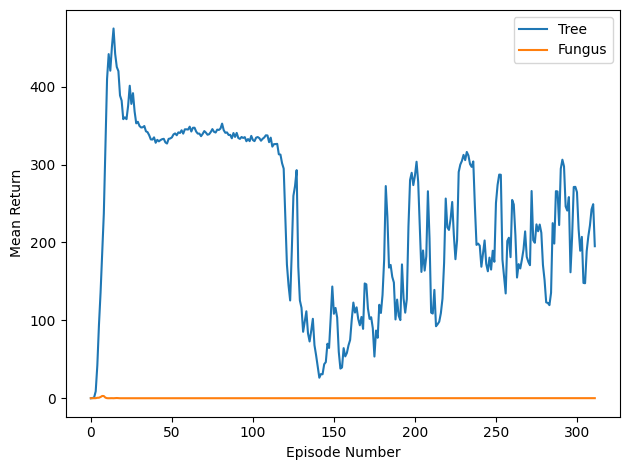

In [7]:
plt.plot(tree_rewards_episodes.sum(axis=-1).mean(axis=0), label='Tree')
plt.plot(fungus_rewards_episodes.sum(axis=-1).mean(axis=0), label='Fungus')
plt.xlabel('Episode Number')
plt.ylabel('Mean Return')
# plt.title('PPO Training Performance')
plt.legend()
plt.tight_layout()

plt.savefig(opath / f"episode_return_per_episode_{RUN_NAME}.png", bbox_inches='tight', dpi=300)
plt.show()

In [8]:
tree_biomass_episodes = eval_utils.extract_episodes(tree_state.biomass, tree_traj.done)
tree_seeds_episodes = eval_utils.extract_episodes(tree_info['seeds_generated'], tree_traj.done)
tree_growth_episodes = eval_utils.extract_episodes(tree_info['growth'], tree_traj.done)
tree_defence_episodes = eval_utils.extract_episodes(tree_info['defence'], tree_traj.done)
tree_health_episodes = eval_utils.extract_episodes(tree_state.health, tree_traj.done)
tree_s_trade_episodes = eval_utils.extract_episodes(tree_info['s_trade'], tree_traj.done)
tree_p_trade_episodes = eval_utils.extract_episodes(tree_info['p_trade'], tree_traj.done)
tree_s_used_episodes = eval_utils.extract_episodes(tree_info['sugars_used'], tree_traj.done)
tree_p_used_episodes = eval_utils.extract_episodes(tree_info['phosphorus_used'], tree_traj.done)
tree_s_gen_episodes = eval_utils.extract_episodes(tree_info['sugars_generated'], tree_traj.done)

fungus_biomass_episodes = eval_utils.extract_episodes(fungus_state.biomass, fungus_traj.done)
fungus_seeds_episodes = eval_utils.extract_episodes(fungus_info['seeds_generated'], fungus_traj.done)
fungus_growth_episodes = eval_utils.extract_episodes(fungus_info['growth'], fungus_traj.done)
fungus_defence_episodes = eval_utils.extract_episodes(fungus_info['defence'], fungus_traj.done)
fungus_health_episodes = eval_utils.extract_episodes(fungus_state.health, fungus_traj.done)
fungus_s_trade_episodes = eval_utils.extract_episodes(fungus_info['s_trade'], fungus_traj.done)
fungus_p_trade_episodes = eval_utils.extract_episodes(fungus_info['p_trade'], fungus_traj.done)
fungus_s_used_episodes = eval_utils.extract_episodes(fungus_info['sugars_used'], fungus_traj.done)
fungus_p_used_episodes = eval_utils.extract_episodes(fungus_info['phosphorus_used'], fungus_traj.done)

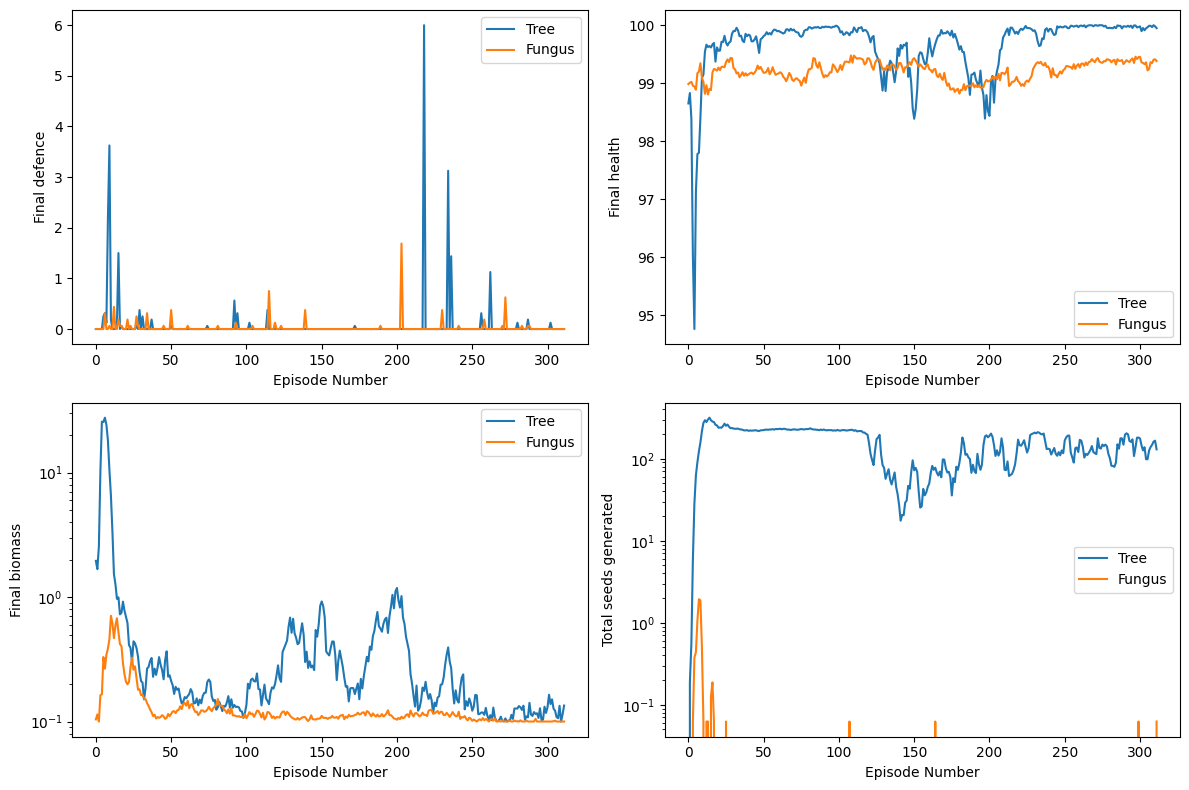

In [9]:
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

axs[0, 0].plot(tree_defence_episodes.mean(axis=0)[:, -2])
axs[0, 0].plot(fungus_defence_episodes.mean(axis=0)[:, -2])
axs[0, 0].set_ylabel('Final defence')

axs[0, 1].plot(tree_health_episodes.mean(axis=0)[:, -2])
axs[0, 1].plot(fungus_health_episodes.mean(axis=0)[:, -2])
axs[0, 1].set_ylabel('Final health')

axs[1, 0].plot(tree_biomass_episodes.mean(axis=0)[:, -2])
axs[1, 0].plot(fungus_biomass_episodes.mean(axis=0)[:, -2])
axs[1, 0].set_yscale('log')
axs[1, 0].set_ylabel('Final biomass')

axs[1, 1].plot(tree_seeds_episodes.sum(axis=-1).mean(axis=0))
axs[1, 1].plot(fungus_seeds_episodes.sum(axis=-1).mean(axis=0))
axs[1, 1].set_yscale('log')
axs[1, 1].set_ylabel('Total seeds generated')

for ax in axs.flat:
    ax.set_xlabel('Episode Number')
    ax.legend(['Tree', 'Fungus'])

plt.tight_layout()
plt.savefig(opath / f"dhbs_per_episode_{RUN_NAME}.png", bbox_inches='tight', dpi=300)
plt.show()

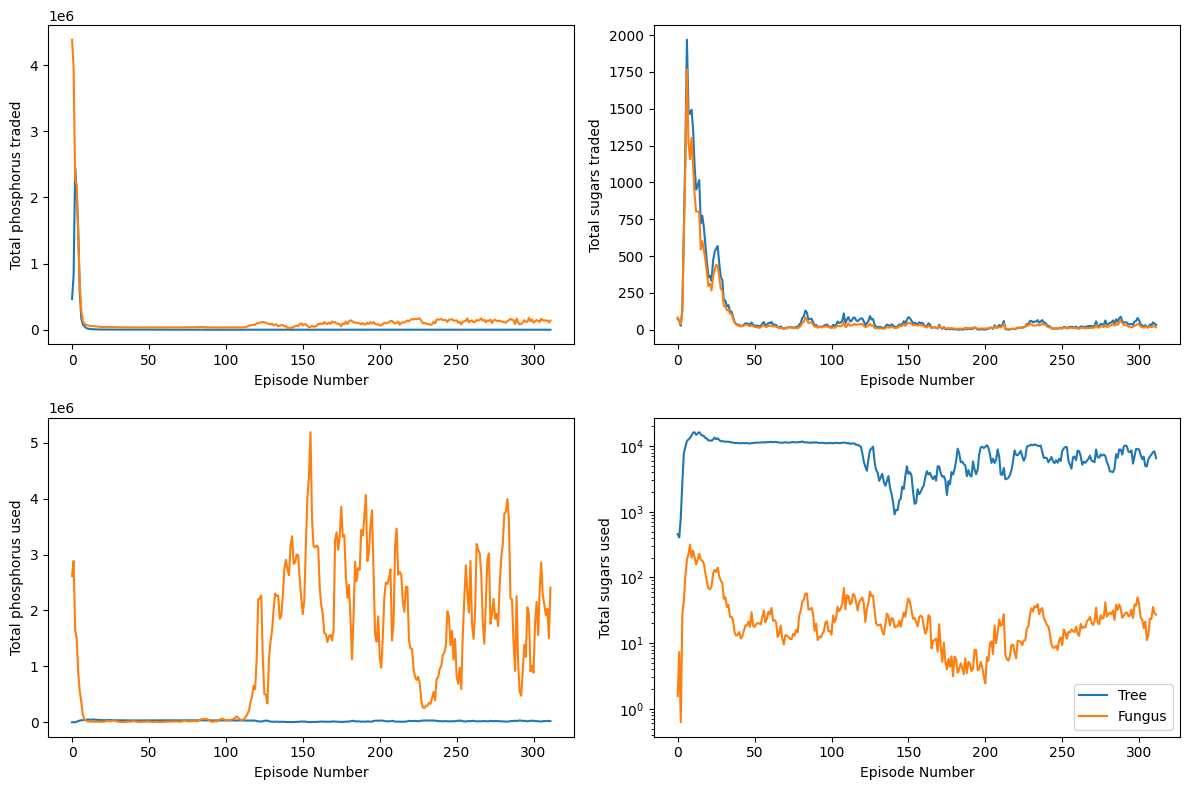

In [10]:
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

axs[0, 0].plot(tree_p_trade_episodes.sum(axis=-1).mean(axis=0))
axs[0, 0].plot(fungus_p_trade_episodes.sum(axis=-1).mean(axis=0))
axs[0, 0].set_ylabel('Total phosphorus traded')

axs[0, 1].plot(tree_s_trade_episodes.sum(axis=-1).mean(axis=0))
axs[0, 1].plot(fungus_s_trade_episodes.sum(axis=-1).mean(axis=0))
axs[0, 1].set_ylabel('Total sugars traded')

axs[1, 0].plot(tree_p_used_episodes.sum(axis=-1).mean(axis=0))
axs[1, 0].plot(fungus_p_used_episodes.sum(axis=-1).mean(axis=0))
axs[1, 0].set_ylabel('Total phosphorus used')

axs[1, 1].plot(tree_s_used_episodes.sum(axis=-1).mean(axis=0))
axs[1, 1].plot(fungus_s_used_episodes.sum(axis=-1).mean(axis=0))
axs[1, 1].set_yscale('log')
axs[1, 1].set_ylabel('Total sugars used')

for ax in axs.flat:
    ax.set_xlabel('Episode Number')

axs[1, 1].legend(['Tree', 'Fungus'])

plt.tight_layout()
plt.savefig(opath / f"ps_trade_usage_per_episode_{RUN_NAME}.png", bbox_inches='tight', dpi=300)
plt.show()

# Evaluation trajectory
Use final policy networks to collect a evaluation trajectory.

In [11]:
env_state, done, info = eval_utils.collect_eval_traj(rng, config, train_state)

/var/folders/g5/h0yjdszs0pz_qr3k5z8bjjq80000gp/T/ipykernel_36516/1012527064.py:14: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


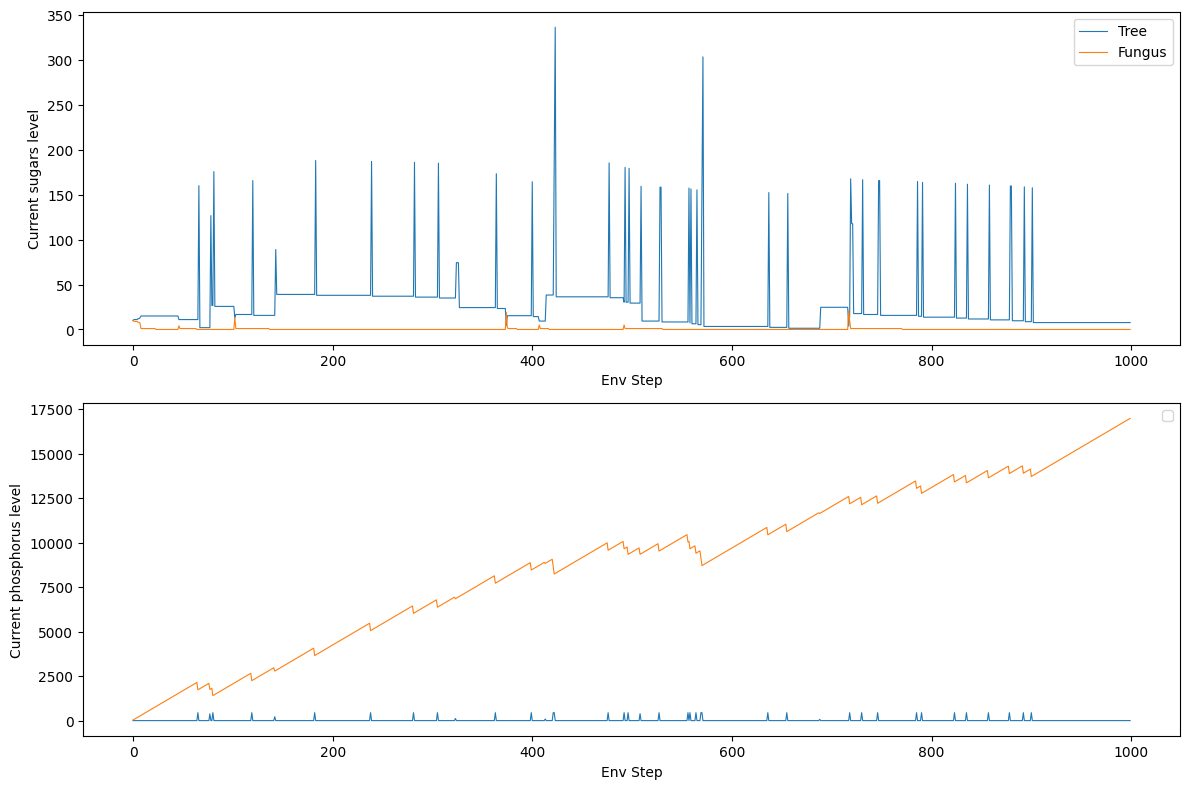

In [12]:
fig, axs = plt.subplots(2, 1, figsize=(12, 8))
linewidth = 0.8

axs[0].plot(env_state.tree_agent.sugars, label='Tree', linewidth=linewidth)
axs[0].plot(env_state.fungus_agent.sugars, label='Fungus', linewidth=linewidth)
axs[0].set_ylabel('Current sugars level')

axs[1].plot(env_state.tree_agent.phosphorus, linewidth=linewidth)
axs[1].plot(env_state.fungus_agent.phosphorus, linewidth=linewidth)
axs[1].set_ylabel('Current phosphorus level')

for ax in axs.flat:
    ax.set_xlabel('Env Step')
    ax.legend()

plt.tight_layout()

plt.savefig(opath / f"eval_episode_sugars_phosphorus_{RUN_NAME}.png", bbox_inches='tight', dpi=300)
plt.show()

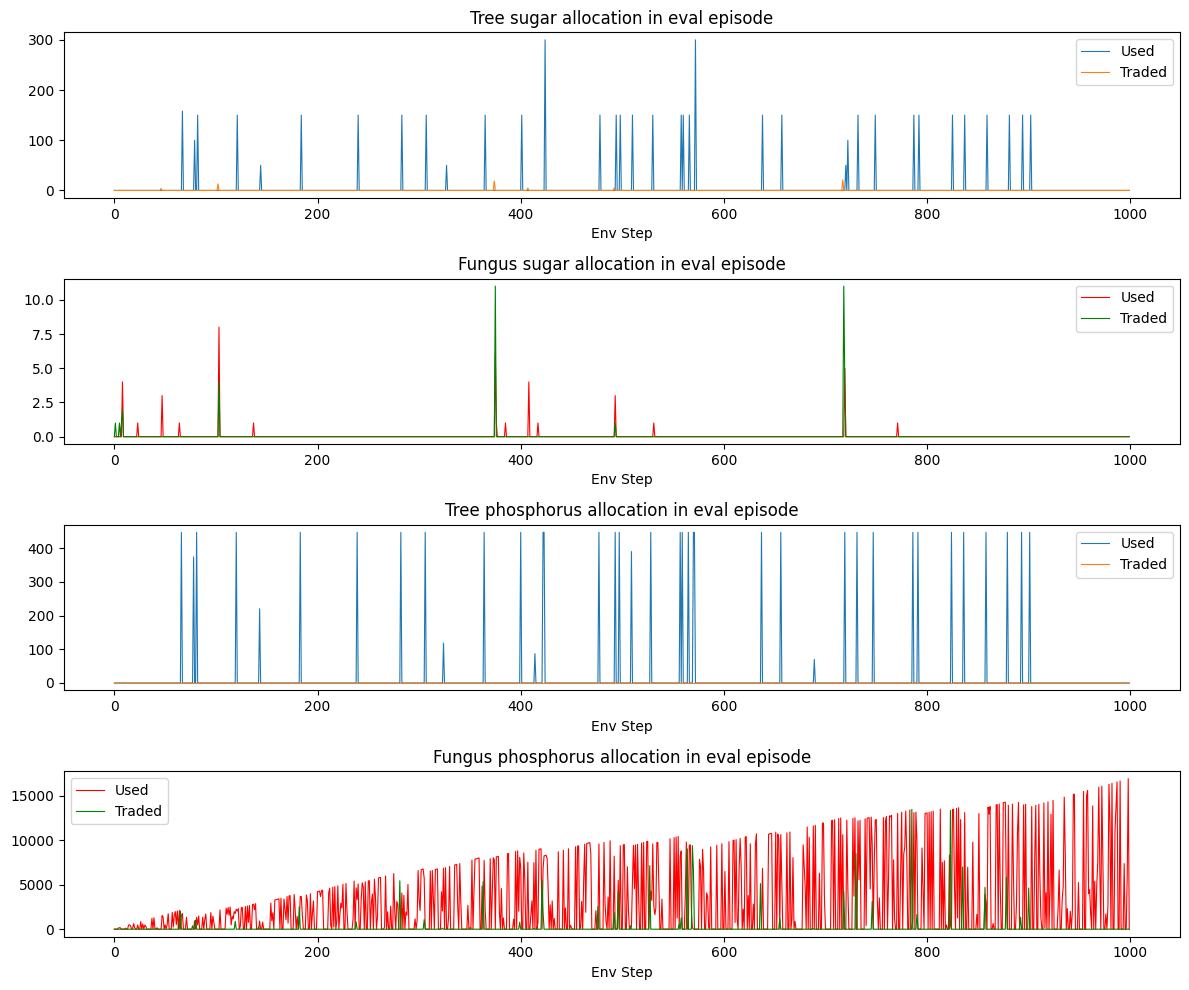

In [13]:
fig, axs = plt.subplots(4, 1, figsize=(12, 10))
linewidth = 0.8

axs[0].plot(info['tree']['sugars_used'], label='Used', linewidth=linewidth)
axs[0].plot(info['tree']['s_trade'], label='Traded', linewidth=linewidth)
axs[0].set_title('Tree sugar allocation in eval episode')

axs[1].plot(info['fungus']['sugars_used'], label='Used', c='r', linewidth=linewidth)
axs[1].plot(info['fungus']['s_trade'], label='Traded', c='g', linewidth=linewidth)
axs[1].set_title('Fungus sugar allocation in eval episode')

axs[2].plot(info['tree']['phosphorus_used'], label='Used', linewidth=linewidth)
axs[2].plot(info['tree']['p_trade'], label='Traded', linewidth=linewidth)
axs[2].set_title('Tree phosphorus allocation in eval episode')

axs[3].plot(info['fungus']['phosphorus_used'], label='Used', c='r', linewidth=linewidth)
axs[3].plot(info['fungus']['p_trade'], label='Traded', c='g', linewidth=linewidth)
axs[3].set_title('Fungus phosphorus allocation in eval episode')

for ax in axs.flat:
    ax.set_xlabel('Env Step')
    ax.legend()

plt.tight_layout()
plt.savefig(opath / f"eval_episode_sugars_phosphorus_usage_{RUN_NAME}.png", bbox_inches='tight', dpi=300)
plt.show()

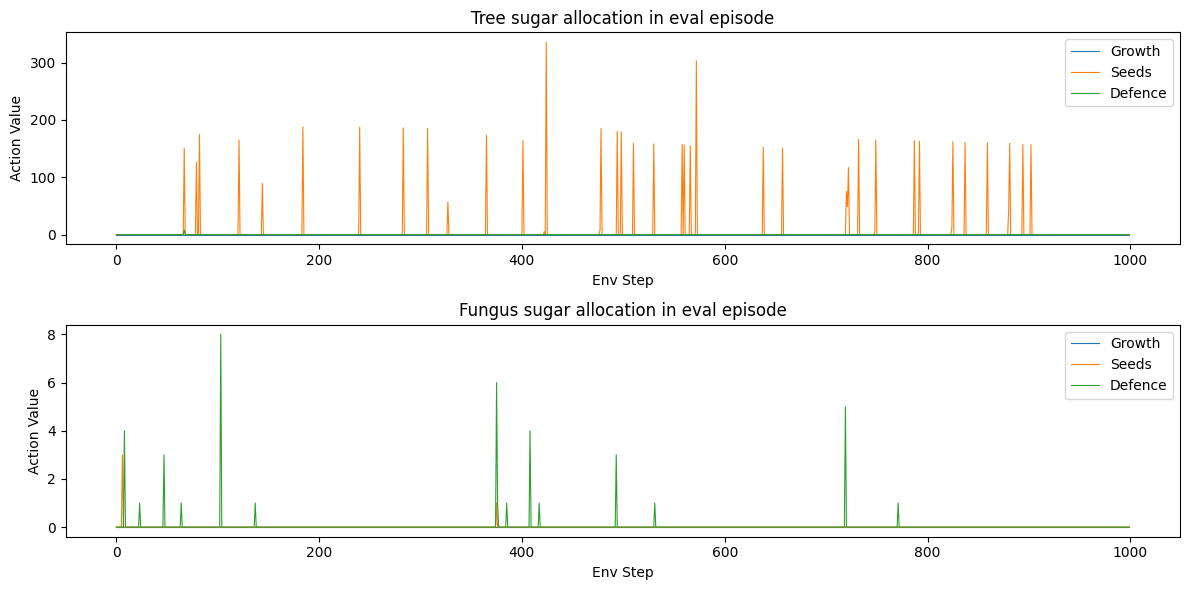

In [14]:
fig, axs = plt.subplots(2, 1, figsize=(12, 6))
linewidth = 0.8

axs[0].plot(info['tree']['growth'], label='Growth', linewidth=linewidth)
axs[0].plot(info['tree']['reproduction'], label='Seeds', linewidth=linewidth)
axs[0].plot(info['tree']['defence'], label='Defence', linewidth=linewidth)
axs[0].set_title('Tree sugar allocation in eval episode')

axs[1].plot(info['fungus']['growth'], label='Growth', linewidth=linewidth)
axs[1].plot(info['fungus']['reproduction'], label='Seeds', linewidth=linewidth)
axs[1].plot(info['fungus']['defence'], label='Defence', linewidth=linewidth)
axs[1].set_title('Fungus sugar allocation in eval episode')

for ax in axs.flat:
    ax.set_xlabel('Env Step')
    ax.set_ylabel('Action Value')
    ax.legend()

plt.tight_layout()

plt.savefig(opath / f"eval_episode_sugar_allocation_{RUN_NAME}.png", bbox_inches='tight', dpi=300)
plt.show()

In [15]:
tree_s_actions = np.stack([info['tree']['sugars_used'], info['tree']['s_trade']])
tree_s_actions_constrained = eval_utils.constrain_actions(tree_s_actions)
fungus_s_actions = np.stack([info['fungus']['sugars_used'], info['fungus']['s_trade']])
fungus_s_actions_constrained = eval_utils.constrain_actions(fungus_s_actions)

tree_p_actions = np.stack([info['tree']['phosphorus_used'], info['tree']['p_trade']])
tree_p_actions_constrained = eval_utils.constrain_actions(tree_p_actions)
fungus_p_actions = np.stack([info['fungus']['phosphorus_used'], info['fungus']['p_trade']])
fungus_p_actions_constrained = eval_utils.constrain_actions(fungus_p_actions)

/Users/campbelli/Documents/MARL-community-assembly/marlplay/twoStwoR/eval_utils.py:108: RuntimeWarning: invalid value encountered in divide
  actions = actions / np.sum(actions, axis=0, keepdims=True)


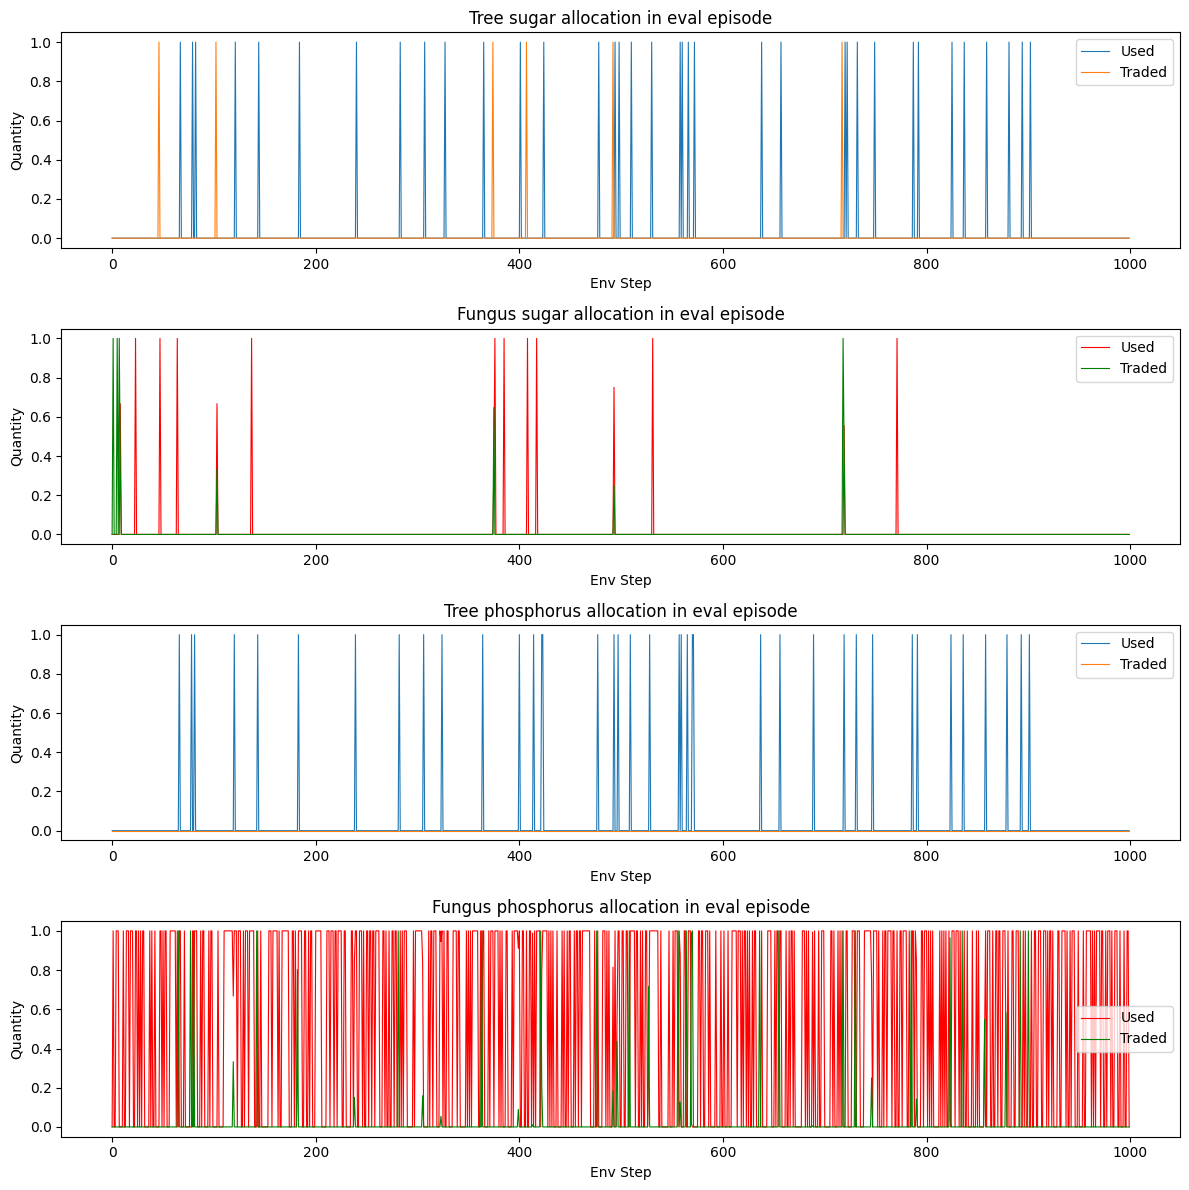

In [16]:
fig, axs = plt.subplots(4, 1, figsize=(12, 12))
linewidth = 0.8

axs[0].plot(tree_s_actions_constrained[0], label='Used', linewidth=linewidth)
axs[0].plot(tree_s_actions_constrained[1], label='Traded', linewidth=linewidth)
axs[0].set_title('Tree sugar allocation in eval episode')
axs[1].plot(fungus_s_actions_constrained[0], label='Used', linewidth=linewidth, c='r')
axs[1].plot(fungus_s_actions_constrained[1], label='Traded', linewidth=linewidth, c='g')
axs[1].set_title('Fungus sugar allocation in eval episode')

axs[2].plot(tree_p_actions_constrained[0], label='Used', linewidth=linewidth)
axs[2].plot(tree_p_actions_constrained[1], label='Traded', linewidth=linewidth)
axs[2].set_title('Tree phosphorus allocation in eval episode')
axs[3].plot(fungus_p_actions_constrained[0], label='Used', linewidth=linewidth, c='r')
axs[3].plot(fungus_p_actions_constrained[1], label='Traded', linewidth=linewidth, c='g')
axs[3].set_title('Fungus phosphorus allocation in eval episode')

for ax in axs.flat:
    ax.set_xlabel('Env Step')
    ax.set_ylabel('Quantity')
    ax.legend()

plt.tight_layout()
plt.savefig(opath / f"eval_episode_sugars_phosphorus_usage_constrained_{RUN_NAME}.png", bbox_inches='tight', dpi=300)
plt.show()

In [17]:
tree_sused_actions = np.stack([info['tree']['growth'], info['tree']['defence'], info['tree']['reproduction']])
tree_sused_actions_constrained = eval_utils.constrain_actions(tree_sused_actions)

fungus_sused_actions = np.stack([info['fungus']['growth'], info['fungus']['defence'], info['fungus']['reproduction']])
fungus_sused_actions_constrained = eval_utils.constrain_actions(fungus_sused_actions)

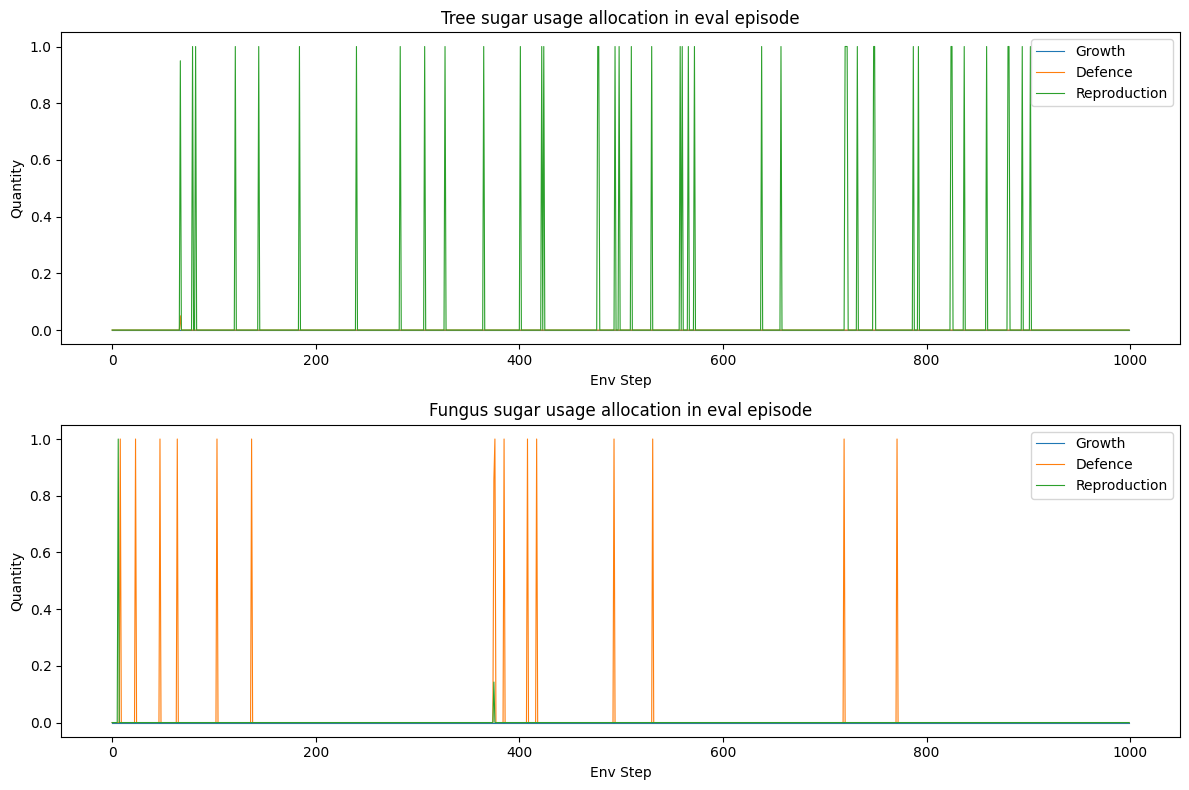

In [18]:
fig, axs = plt.subplots(2, 1, figsize=(12, 8))
linewidth = 0.8

axs[0].plot(tree_sused_actions_constrained[0], label='Growth', linewidth=linewidth)
axs[0].plot(tree_sused_actions_constrained[1], label='Defence', linewidth=linewidth)
axs[0].plot(tree_sused_actions_constrained[2], label='Reproduction', linewidth=linewidth)
axs[0].set_title('Tree sugar usage allocation in eval episode')
axs[1].plot(fungus_sused_actions_constrained[0], label='Growth', linewidth=linewidth)
axs[1].plot(fungus_sused_actions_constrained[1], label='Defence', linewidth=linewidth)
axs[1].plot(fungus_sused_actions_constrained[2], label='Reproduction', linewidth=linewidth)
axs[1].set_title('Fungus sugar usage allocation in eval episode')

for ax in axs.flat:
    ax.set_xlabel('Env Step')
    ax.set_ylabel('Quantity')
    ax.legend()

plt.tight_layout()
plt.savefig(opath / f"eval_episode_sugar_allocation_constrained_{RUN_NAME}.png", bbox_inches='tight', dpi=300)
plt.show()

# Train with multiple seeds to inspect impact of weights initialisation

In [19]:
config["NUM_SEEDS"] = 5

In [20]:
train_fn = ppo.make_train(config)
rng = jax.random.PRNGKey(config["SEED"])
rngs = jax.random.split(rng, config["NUM_SEEDS"])

with jax.disable_jit(False):
    train_jit = jax.jit(jax.vmap(train_fn))
    out = train_jit(rngs)

In [21]:
train_state, env_state, obs, rng = out['runner_state']
tree_traj, fungus_traj, metric = out['info']

In [ ]:
colours = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']

plt.figure(figsize=(12, 6))
# plt.title('PPO Training Performance Across Multiple Seeds')
plt.grid(True)

for i in range(config["NUM_SEEDS"]):
    tree_rewards_episodes = eval_utils.extract_episodes(tree_traj.reward[i], tree_traj.done[i])
    fungus_rewards_episodes = eval_utils.extract_episodes(fungus_traj.reward[i], fungus_traj.done[i])

    plt.plot(tree_rewards_episodes.sum(axis=-1).mean(axis=0), linestyle='--', c=colours[i])
    plt.plot(fungus_rewards_episodes.sum(axis=-1).mean(axis=0), label=f'Seed {i+1}', c=colours[i])
    plt.xlabel('Updates')
    plt.ylabel('Mean Episode Return')
    plt.legend()

plt.xlabel("Episode Number")
plt.ylabel("Return (log)")
plt.yscale('log')
plt.tight_layout()
plt.savefig(opath / f"episode_return_per_episode_multiple_seeds_{RUN_NAME}.png", bbox_inches='tight', dpi=300)
plt.show()